<a href="https://colab.research.google.com/github/Anusreek30/Anusreek30/blob/main/Credit_Risk_Model_for_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
df_customers=pd.read_csv('/content/customers.csv')
df_loans=pd.read_csv('/content/loans (1).csv')
df_bureau_data=pd.read_csv('/content/bureau_data (3).csv')

In [ ]:
df_customers.shape,df_loans.shape,df_bureau_data.shape

((50000, 12), (50000, 15), (50000, 8))

In [ ]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [ ]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [ ]:
df_bureau_data.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


Merging customer dataset and loan dataset with customer id

In [ ]:
df=pd.merge(df_customers,df_loans,on='cust_id')
df.shape

(50000, 26)

In [ ]:
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [ ]:
df=pd.merge(df,df_bureau_data,on='cust_id')

In [ ]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [ ]:
df.shape

(50000, 33)

changing default data type into int with value 0 and 1

In [ ]:
df['default']=df['default'].astype(int)



In [ ]:
df.default.value_counts()

,count
default,
0,45703
1,4297


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

Train test spliting

In [ ]:
x=df.drop('default',axis='columns')
y=df['default']

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

df_train=pd.concat([x_train,y_train],axis='columns')
df_test=pd.concat([x_test,y_test],axis='columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


Handling missing and duplicate values

In [ ]:
df_train.shape

(37500, 33)

In [ ]:
df_train.isna().sum()

,0
cust_id,0
age,0
gender,0
marital_status,0
employment_status,0
income,0
number_of_dependants,0
residence_type,47
years_at_current_address,0
city,0


In [ ]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [ ]:
mode_residence_type=df_train.residence_type.mode()[0]
mode_residence_type

'Owned'

In [ ]:
df_train.residence_type.fillna(mode_residence_type,inplace=True)
df_test.residence_type.fillna(mode_residence_type,inplace=True)
df_train.residence_type.unique(),df_test.residence_type.unique()

<ipython-input-20-362acc1147e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence_type,inplace=True)
<ipython-input-20-362acc1147e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,...,3.750000e+04,3.750000e+04,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000
mean,39.540587,2.633326e+06,1.944533,15.997787,418866.253333,4.699692e+06,3.996068e+06,8.029068e+04,7.192922e+05,3.196854e+06,...,1.333820e+06,9.862989e+05,2.502907,1.001120,76.11104,4.844853,26.672613,5.008533,43.424880,0.085947
std,9.858344,2.623781e+06,1.535943,8.921041,169035.021773,6.257833e+06,5.371862e+06,1.131281e+05,9.669352e+05,4.297490e+06,...,1.213674e+06,1.043145e+06,1.119070,0.814021,43.76852,5.841396,32.779424,2.029236,29.392857,0.280289
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,8.020000e+05,0.000000,8.000000,302001.000000,1.142000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,...,4.221975e+05,2.870402e+05,1.000000,0.000000,42.00000,0.000000,0.000000,4.000000,18.000000,0.000000
50%,39.000000,1.885000e+06,2.000000,16.000000,400001.000000,2.644000e+06,2.230000e+06,4.460000e+04,4.014000e+05,1.784000e+06,...,9.974275e+05,6.650145e+05,3.000000,1.000000,71.00000,3.000000,13.000000,5.000000,39.000000,0.000000
75%,46.000000,3.326250e+06,3.000000,24.000000,560001.000000,5.178000e+06,4.619000e+06,9.242000e+04,8.314200e+05,3.695200e+06,...,1.784879e+06,1.234063e+06,4.000000,2.000000,107.00000,8.000000,46.000000,6.000000,67.000000,0.000000
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,5.217500e+07,4.781900e+07,5.293544e+06,8.607420e+06,3.825520e+07,...,5.000000e+06,7.846643e+06,4.000000,2.000000,223.00000,24.000000,171.000000,9.000000,99.000000,1.000000


In [ ]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [ ]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


VISUALIZATION using Box Plot


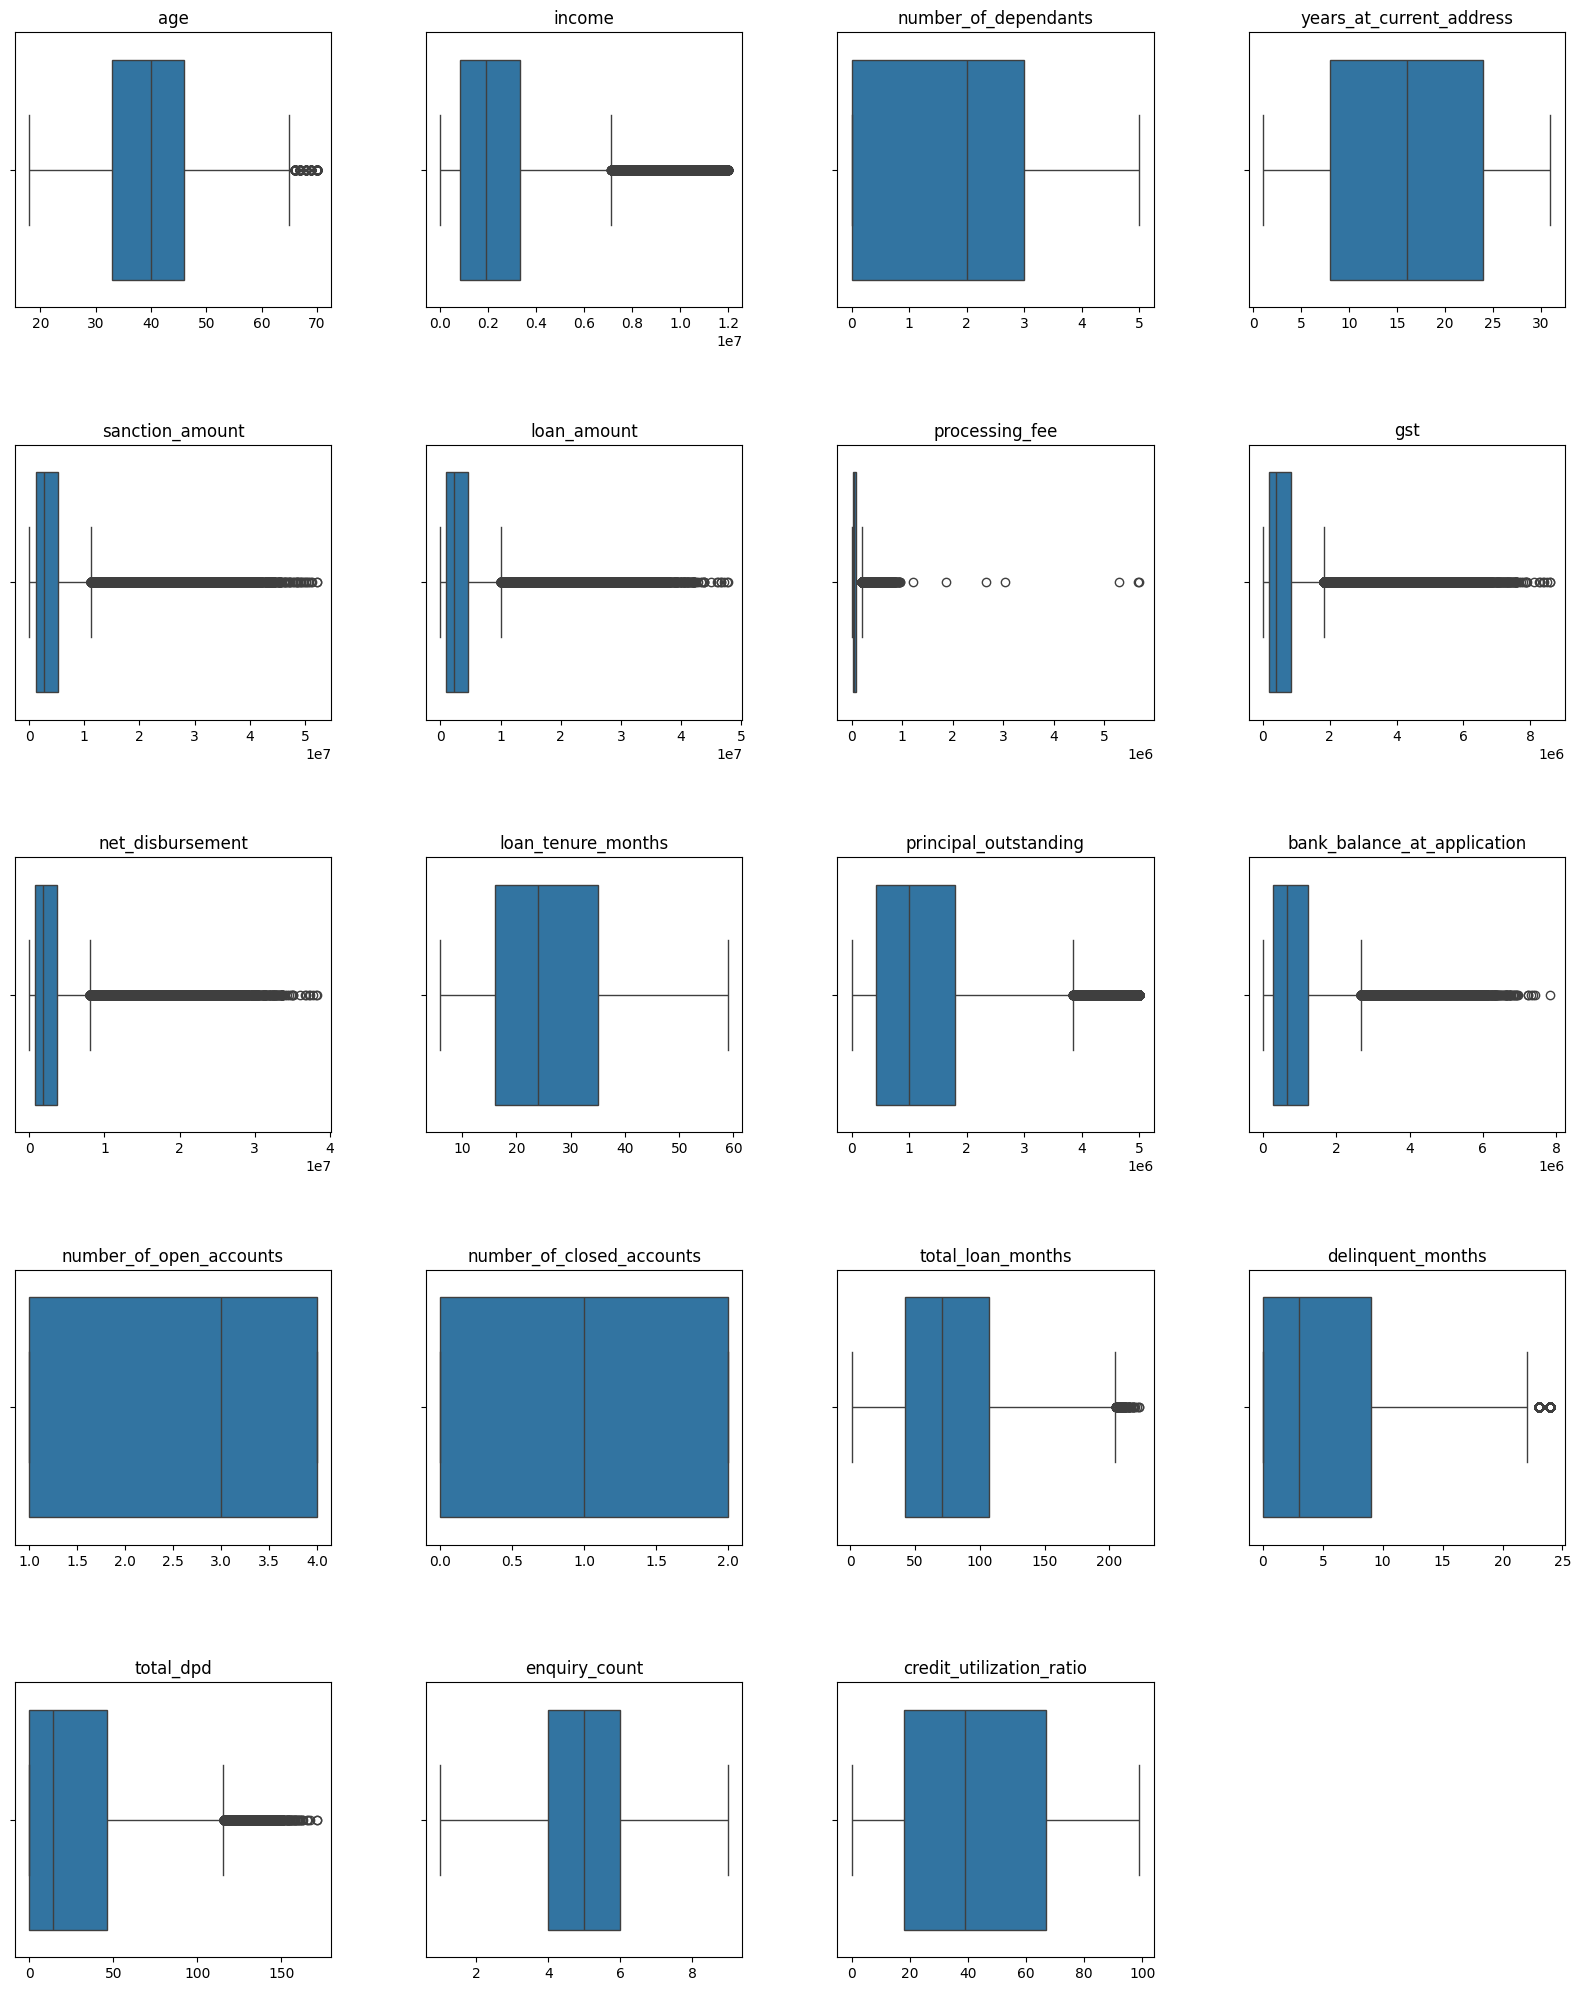

In [ ]:


num_columns = len(columns_continuous)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Adjust figure size as needed
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each column
for i, column in enumerate(columns_continuous):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

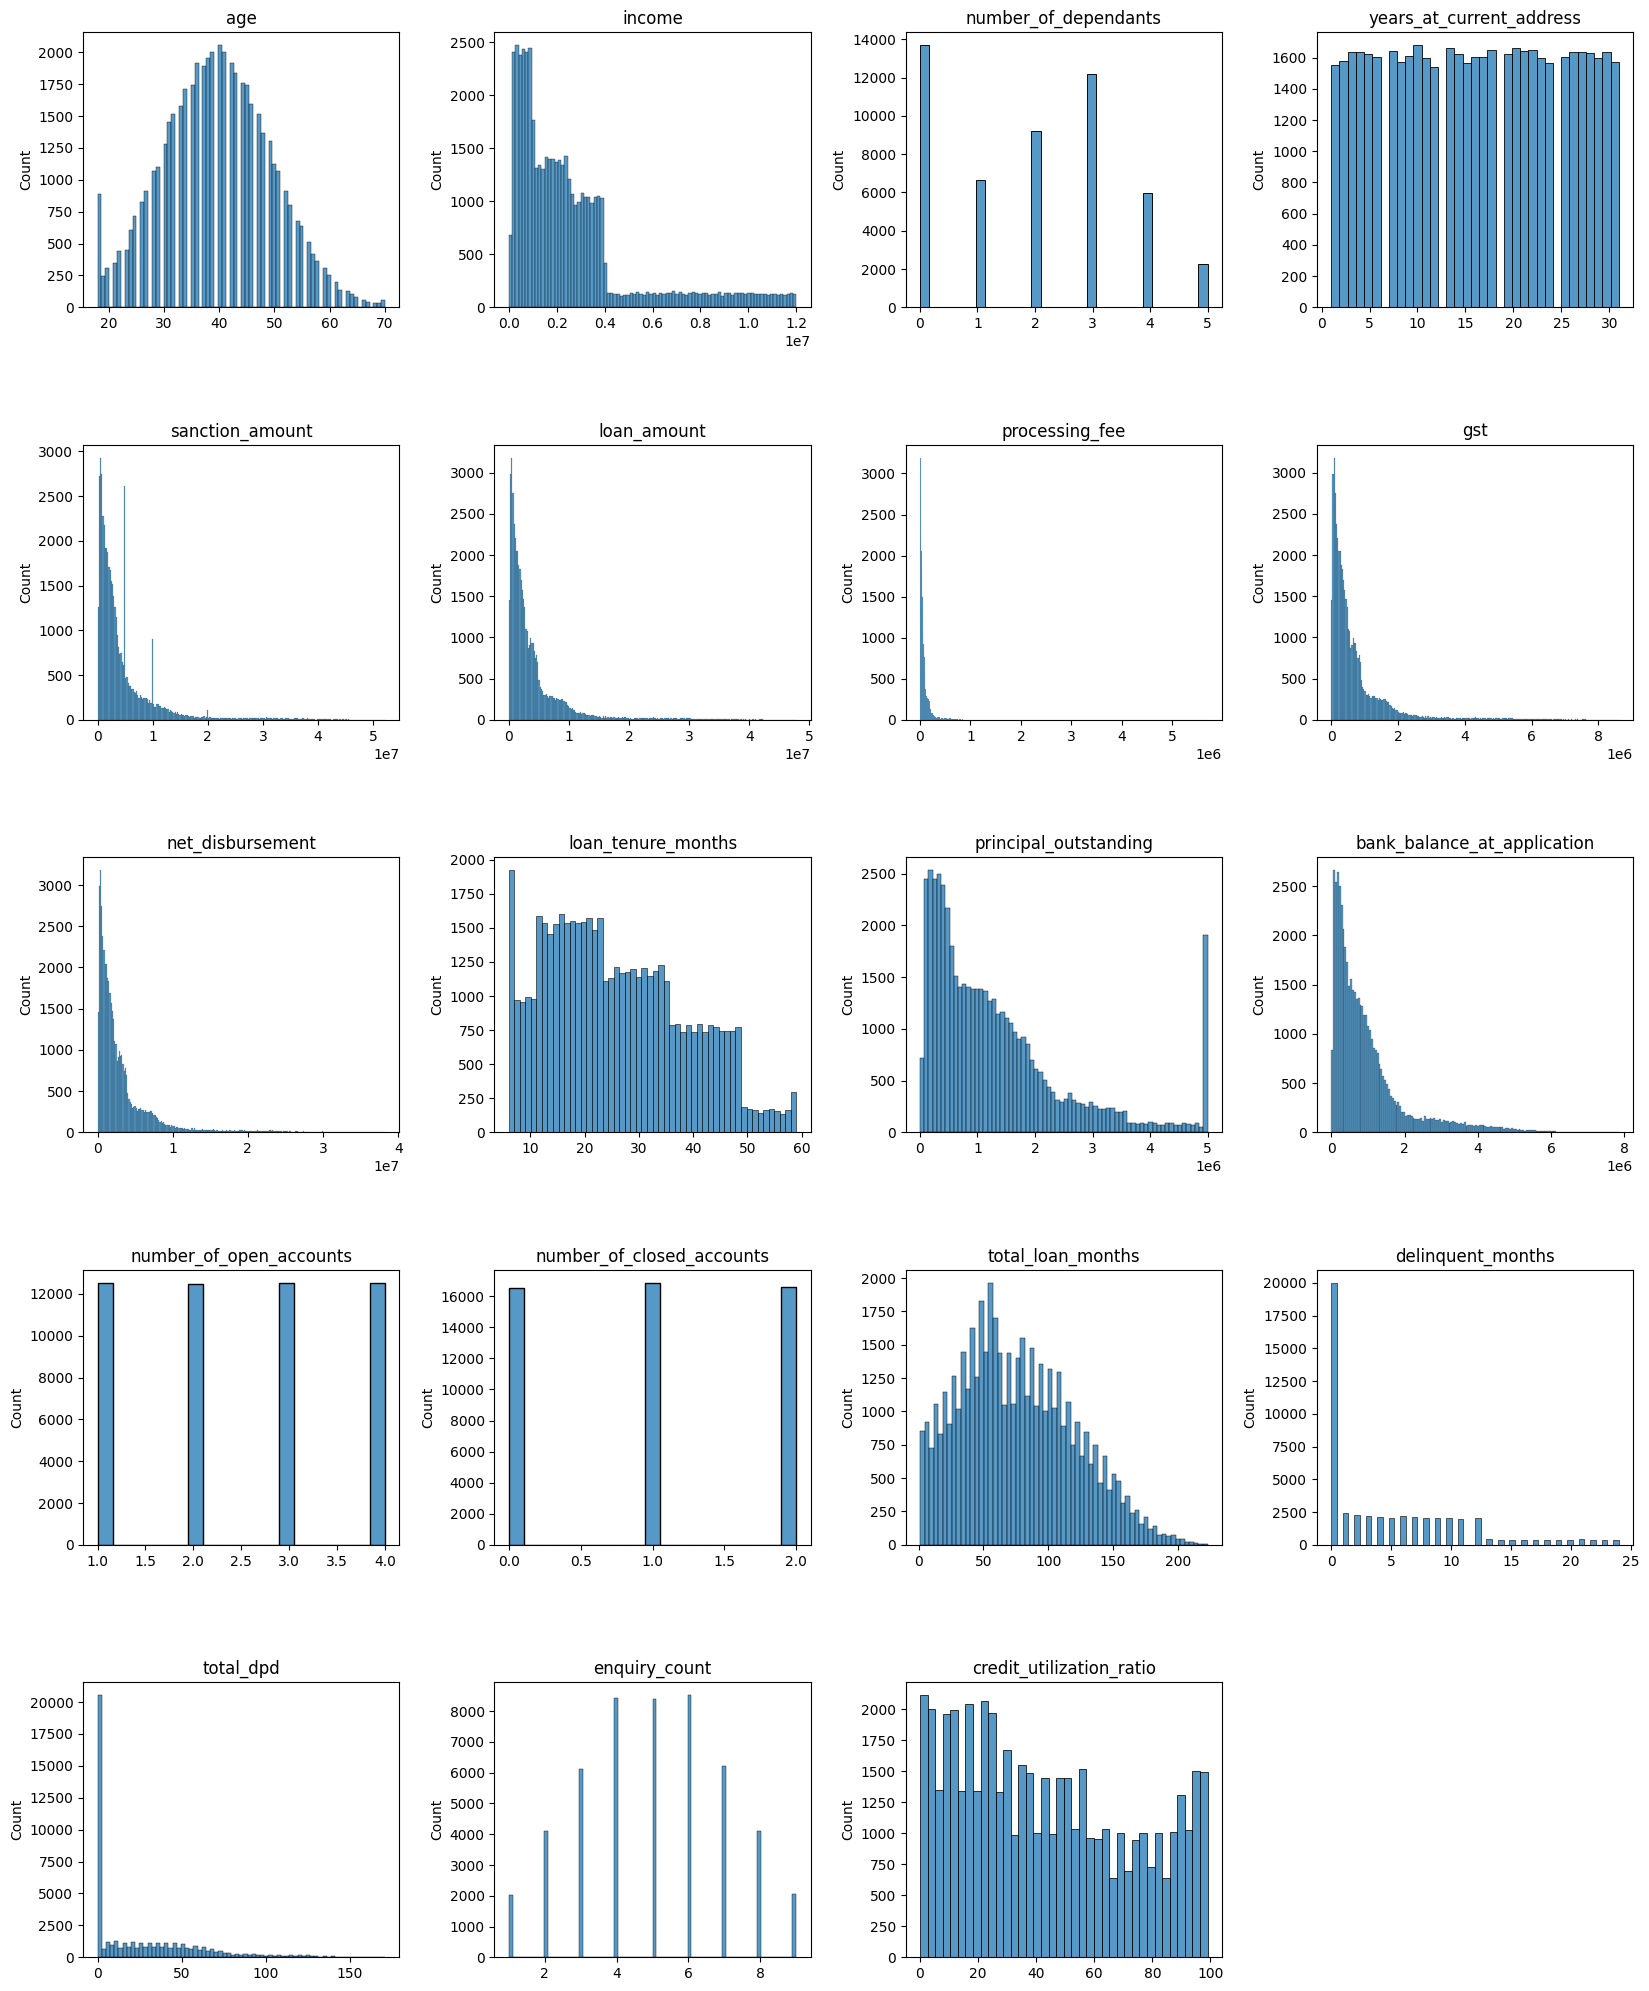

In [ ]:
import seaborn as sns

num_columns = len(columns_continuous)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Adjust figure size as needed
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histplot for each column
for i, column in enumerate(columns_continuous):
    sns.histplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

Outlier Removal for Processing Fee


In [ ]:
df_train.processing_fee.describe()

,processing_fee
count,3.750000e+04
mean,8.029068e+04
std,1.131281e+05
min,0.000000e+00
25%,1.922000e+04
50%,4.460000e+04
75%,9.242000e+04
max,5.293544e+06


In [ ]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][['processing_fee','loan_amount']]

,processing_fee,loan_amount
23981,2.669791e+06,2234000
28174,1.214493e+06,966000
47089,1.858965e+06,1738000
29305,3.036378e+06,2616000
9898,5.293544e+06,3626000


In [ ]:
df_train_1=df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape


(37488, 33)

In [ ]:
df_test=df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [ ]:
#use other buisness rules for data validation
#rule 1: GST  should not be more than 20%
df_train_1[df_train_1.gst/df_train_1.loan_amount>0.2].shape

(0, 33)

In [ ]:
#rule 2:Net_disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

there will be no rows to breaks rule 1 and 2

**Analysing Categorical Columns**


In [ ]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
for col in columns_categorical:
  print(col,"-->",df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


Fix and changing the errors in loan_purpose column

In [ ]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')


In [ ]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [ ]:
#changing test data
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')

In [ ]:
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

Age column

In [ ]:
df_train_1.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.0,39.767693,9.880235,18.0,33.0,40.0,46.0,70.0
1,3223.0,37.124729,9.290168,18.0,31.0,37.0,44.0,70.0


1.By analyzing Age column in the column default 0 is higher than default 1
2.variablity(standard deviation) is mostly similar in both groups
3.both the groups have similar max and min ages

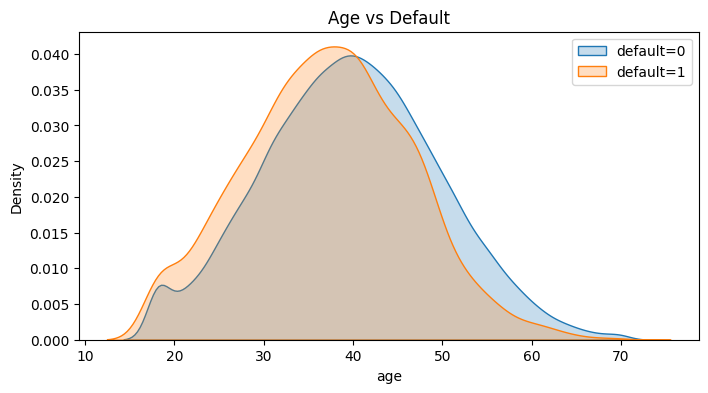

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train_1[df_train_1.default==0].age,label='default=0',fill='true')
sns.kdeplot(df_train_1[df_train_1.default==1].age,label='default=1',fill='true')
plt.title('Age vs Default')
plt.legend()
plt.show()


insights
  1. Orange(defaulted)group is slightly shifted to left indicating that younger folks are more likely to default on their loans

  KDE FOR ALL CONTINOUS COLUMNS

<Axes: xlabel='income', ylabel='Density'>

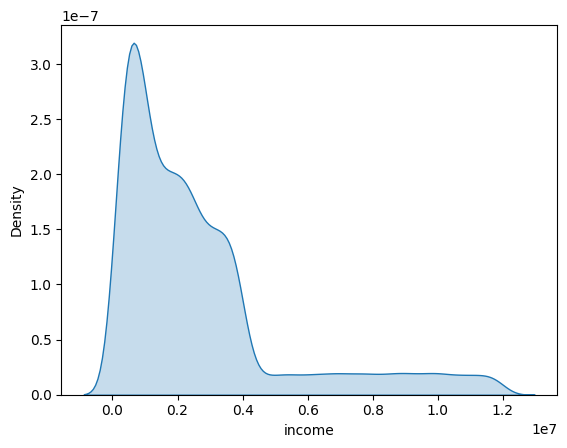

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0].income,label='default=0',fill='true')

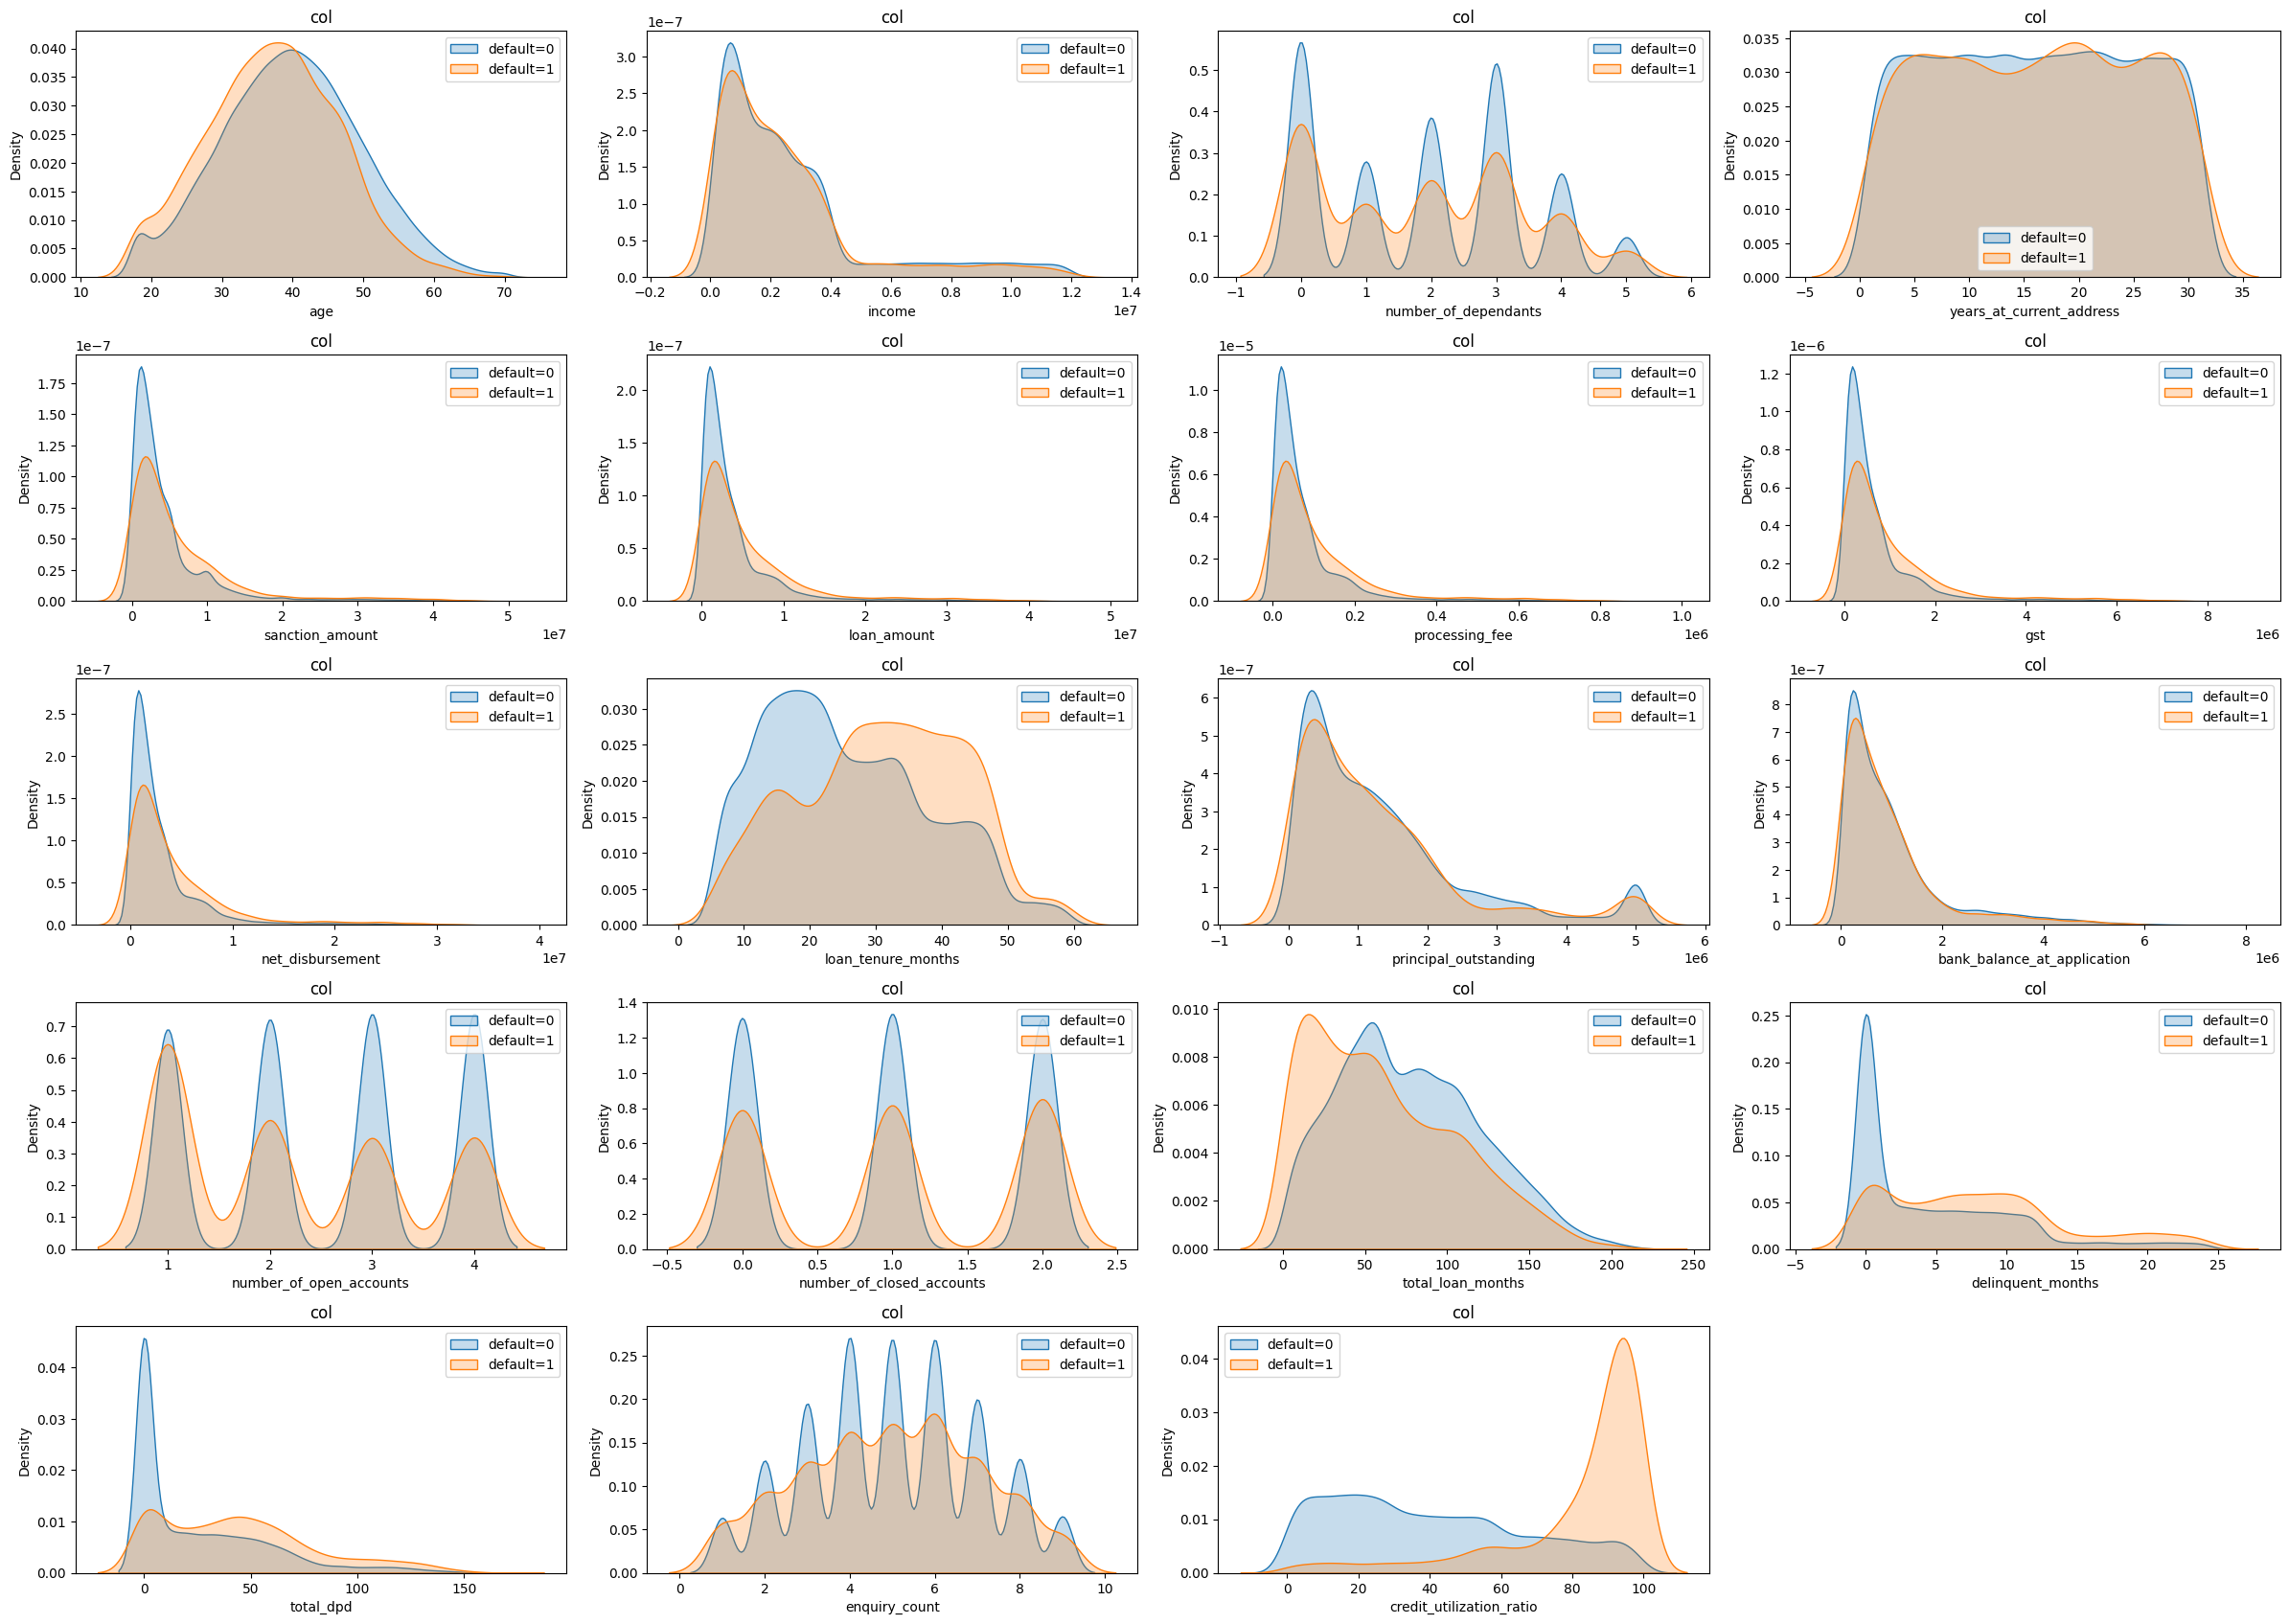

In [ ]:
plt.figure(figsize=(24,20))
for i,col in enumerate(columns_continuous):
  plt.subplot(6,4,i+1)
  sns.kdeplot(df_train_1[df_train_1.default==0][col],label='default=0',fill='true')
  sns.kdeplot(df_train_1[df_train_1.default==1][col],label='default=1',fill='true')
  plt.title('col')
  plt.legend()
  plt.tight_layout()
plt.show()

insights
  1.In columns:loan_tenure_months,delinquent_months,total_dpd,credit_utilization,higher values indicate high likelywood of becoming default.Hence four tools like strong predictors.
  2.In remaining columns the distributions do not give any obvious insights
  3.Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio

1.   List item
2.   List item



Generate Loan TO Income(LTI)Ratio

In [ ]:
df_train_1[['loan_amount','income']].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [ ]:
df_train_1['loan_to_income']=round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

,loan_to_income
count,37488.000000
mean,1.556711
std,0.973687
min,0.300000
25%,0.770000
50%,1.160000
75%,2.460000
max,4.570000


In [ ]:
df_test['loan_to_income']=round(df_test['loan_amount']/df_test['income'],2)


In [ ]:
df_test['loan_to_income'].describe()

,loan_to_income
count,12497.000000
mean,1.551274
std,0.965773
min,0.300000
25%,0.780000
50%,1.160000
75%,2.430000
max,4.590000


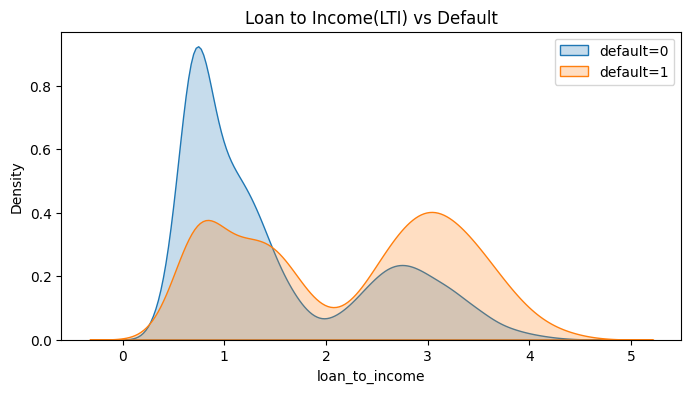

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train_1[df_train_1.default==0].loan_to_income,label='default=0',fill='true')
sns.kdeplot(df_train_1[df_train_1.default==1].loan_to_income,label='default=1',fill='true')
plt.title('Loan to Income(LTI) vs Default')
plt.legend()
plt.show()


INSIGHTS

1.   Blue graph has majority of its values on lower side of LTI
2.   Orange graph has many values when LTI is higher indicating that higher LTI  means high risk to loan



Generate Delinquency Ratio

In [ ]:
df_train_1['delinquency_ratio']=(df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio']=(df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)

In [ ]:
df_train_1.delinquency_ratio.describe()


,delinquency_ratio
count,37488.000000
mean,10.329884
std,17.298463
min,0.000000
25%,0.000000
50%,3.700000
75%,12.900000
max,100.000000


In [ ]:
df_test.delinquency_ratio.describe()

,delinquency_ratio
count,12497.000000
mean,10.607418
std,17.308141
min,0.000000
25%,0.000000
50%,4.200000
75%,13.400000
max,100.000000


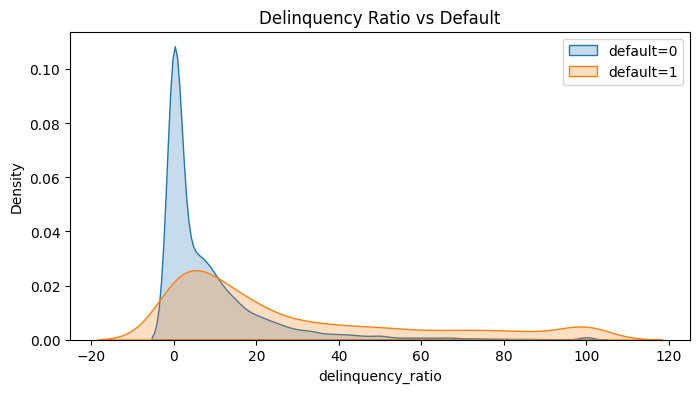

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train_1[df_train_1.default==0].delinquency_ratio,label='default=0',fill='true')
sns.kdeplot(df_train_1[df_train_1.default==1].delinquency_ratio,label='default=1',fill='true')
plt.title('Delinquency Ratio vs Default')
plt.legend()
plt.show()



INSIGHTS

1.   Blue graph has majority of its values on lower side of LTI
2.   Orange graph has many values when deliquency ratio is higher indicating some correlation on default



Generate Avg DPD per delinquency

In [ ]:
df_train_1['avg_dpd_per_delinquency']=np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)
df_test['avg_dpd_per_delinquency']=np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

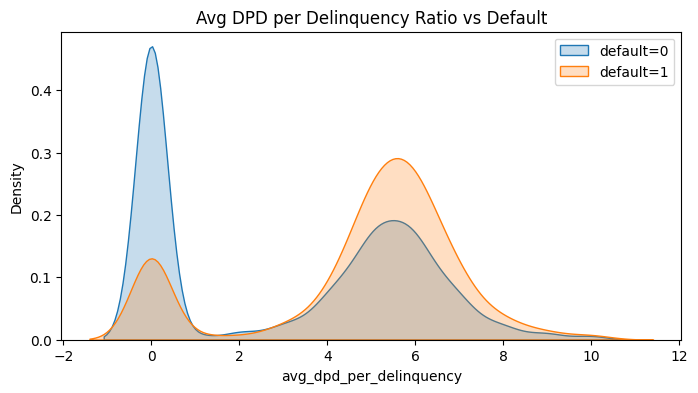

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train_1[df_train_1.default==0].avg_dpd_per_delinquency,label='default=0',fill='true')
sns.kdeplot(df_train_1[df_train_1.default==1].avg_dpd_per_delinquency,label='default=1',fill='true')
plt.title('Avg DPD per Delinquency Ratio vs Default')
plt.legend()
plt.show()

INSIGHTS

1.   Graph clearly shows more occurances of default cases when avg_dpd_per_deliquency is high. This means this column is a strong predictor



Remove Columns that are just unique ids and don't have influence on target

In [ ]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis='columns')
df_test=df_test.drop(['cust_id','loan_id'],axis='columns')

Remove Columns that buisness contact person asked us to remove

In [ ]:
df_train_3=df_train_2.drop(['disbursal_date','installment_start_dt','loan_amount','income','total_loan_months','delinquent_months','total_dpd'],axis='columns')
df_test=df_test.drop(['disbursal_date','installment_start_dt','loan_amount','income','total_loan_months','delinquent_months','total_dpd'],axis='columns')

In [ ]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
df_train_3.shape

(37488, 27)

In [ ]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

VIF to measure Multicollinearity

In [ ]:
x_train=df_train_3.drop('default',axis='columns')
y_train=df_train_3['default']
cols_to_scale=x_train.select_dtypes(["int64","float64"]).columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[cols_to_scale]=scaler.fit_transform(x_train[cols_to_scale])
x_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103299,0.328391
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172985,0.290663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.037000,0.430000
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129000,0.572500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Same Transformation on Test Set

In [ ]:
x_test=df_test.drop('default',axis='columns')
y_test=df_test['default']

x_test[cols_to_scale]=scaler.transform(x_test[cols_to_scale])
x_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.089218,0.082800,0.082800,0.082800,0.375092,0.264632,0.124944,0.497293,0.500440,0.501470,0.436038,0.293038,0.106074,0.333844
std,0.188773,0.306871,0.298103,0.286179,0.120844,0.112877,0.112877,0.112877,0.233792,0.245290,0.134708,0.372576,0.407226,0.253618,0.295418,0.226176,0.173081,0.289680
min,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,-0.000126,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020958,0.019387,0.019387,0.019387,0.188679,0.079715,0.034167,0.000000,0.000000,0.375000,0.181818,0.112412,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.050189,0.046249,0.046249,0.046249,0.339623,0.198239,0.084024,0.333333,0.500000,0.500000,0.393939,0.201405,0.042000,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.097422,0.094927,0.094927,0.094927,0.547170,0.356914,0.157792,0.666667,1.000000,0.625000,0.676768,0.498829,0.134000,0.580000
max,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,0.963717,0.963717,1.000000,1.000000,0.939154,1.000000,1.000000,1.000000,1.000000,1.004684,1.000000,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df



In [ ]:
x_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,0.415094,1.00000,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.132,0.59
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.830189,0.08702,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.062,0.62


In [ ]:
calculate_vif(x_train[cols_to_scale])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.700665
1,number_of_dependants,2.730312
2,years_at_current_address,3.422577
3,zipcode,3.797524
4,sanction_amount,101.086559
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180519
9,principal_outstanding,16.326471


In [ ]:
features_to_drop_vif=['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']
x_train_1=x_train.drop(features_to_drop_vif,axis='columns')
numeric_columns=x_train_1.select_dtypes(['int64','float64']).columns
numeric_columns


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
calculate_vif(x_train_1[numeric_columns])

,Column,VIF
0,age,5.429171
1,number_of_dependants,2.726774
2,years_at_current_address,3.403712
3,zipcode,3.777885
4,loan_tenure_months,6.018724
5,bank_balance_at_application,1.804693
6,number_of_open_accounts,4.353487
7,number_of_closed_accounts,2.372449
8,enquiry_count,6.384110
9,credit_utilization_ratio,2.919822


In [ ]:
calculate_vif(x_train_1[numeric_columns])

#Assign the result of calculate_vif function to vif_df
vif_df = calculate_vif(x_train_1[numeric_columns])

selected_numeric_features_vif=vif_df.Column.values # Access using "Column"
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [ ]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

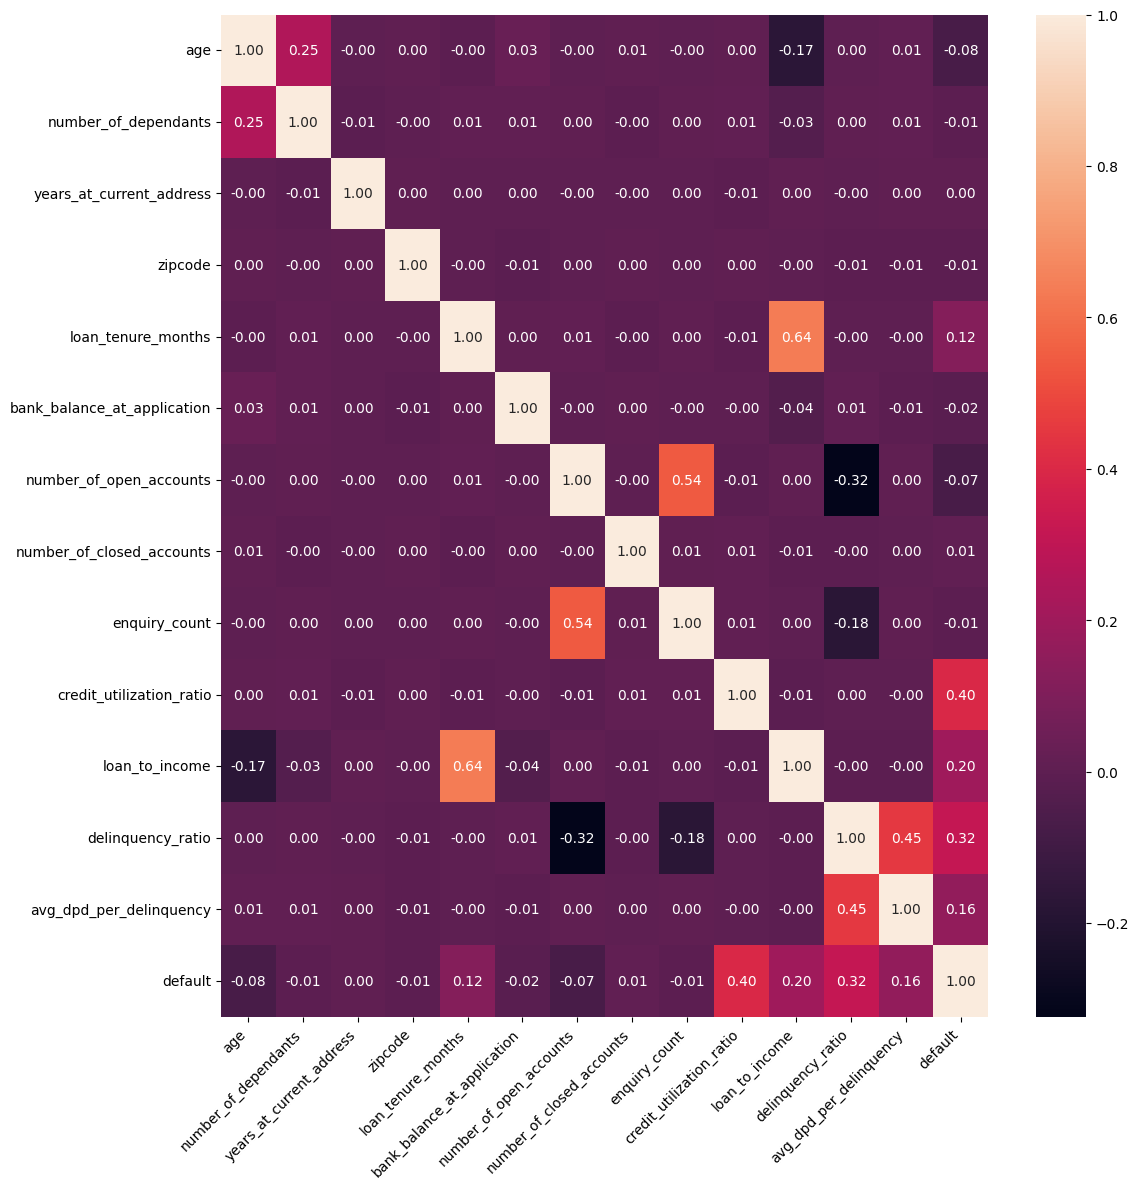

In [ ]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True,fmt='0.2f')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Feature Selection: Categorical Features

In [ ]:
x_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,Secured,0.415094,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.132,0.59
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,Secured,0.830189,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.062,0.62
43675,0.384615,M,Single,Salaried,0.0,Mortgage,0.833333,Chennai,Tamil Nadu,0.830508,...,Secured,0.490566,0.174318,0.000000,0.5,0.375,0.000000,0.758782,0.222,0.56
9040,0.461538,M,Married,Salaried,0.4,Mortgage,0.966667,Bangalore,Karnataka,0.762712,...,Secured,0.641509,0.077523,0.666667,0.0,0.875,0.878788,0.194379,0.000,0.00
13077,0.769231,M,Married,Self-Employed,0.8,Owned,0.933333,Pune,Maharashtra,0.510169,...,Unsecured,0.169811,0.072271,0.000000,1.0,0.000,0.717172,0.046838,0.000,0.00


Calculate WOE and IV

In [ ]:
def calculate_woe_iv(df,feature,target):

  grouped = df.groupby(feature)[target].agg(['count','sum'])
  grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
  grouped['bad']=grouped['total']-grouped['good']

  total_good = grouped['good'].sum()
  total_bad = grouped['bad'].sum()
  grouped['good_pct'] = grouped['good'] / total_good
  grouped['bad_pct'] = grouped['bad'] / total_bad
  grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
  grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
  grouped['woe'] = grouped['woe'].replace([np.inf,-np.inf],0)
  grouped['iv'] = grouped['iv'].replace([np.inf,-np.inf],0)

  total_iv=grouped['iv'].sum()
  return grouped,total_iv
grouped,total_iv=calculate_woe_iv(pd.concat([x_train_1,y_train],axis=1),'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [ ]:
x_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [ ]:
iv_values={}
for feature in x_train_1.columns:
    if x_train_1[feature].dtype=='object':
      _,iv=calculate_woe_iv(pd.concat([x_train_1,y_train],axis=1),feature,'default')
    else:
      x_binned = pd.cut(x_train_1[feature], bins=10, labels=False) #Fixed: Using x_train_1 instead of X_train_1
      _,iv=calculate_woe_iv(pd.concat([x_binned,y_train],axis=1),feature,'default') #Fixed: Indentation Corrected

    iv_values[feature]=iv
iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40151905412190175}

In [ ]:
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))
iv_df=pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df=iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [ ]:
#select features that has IV>0.02
selected_features_iv=[feature for feature,iv in iv_values.items() if iv>0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

Feature Encoding

In [ ]:
x_train_reduced=x_train_1[selected_features_iv]
x_test_reduced=x_test[selected_features_iv]

In [ ]:
x_train_encoded=pd.get_dummies(x_train_reduced,drop_first=True)
x_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


In [ ]:
x_test_encoded=pd.get_dummies(x_test_reduced,drop_first=True)
x_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False


# MODEL TRAINING

Attempt 1

1.   Logistic Regression,Random Forest &XGB
2.   No handling of class imbalance



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(x_train_encoded,y_train)

y_pred=model.predict(x_test_encoded)
report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [ ]:
model.coef_[0]

array([-0.5305489 ,  0.39827838,  0.63575649, 12.64595158, 10.68629395,
        9.44033594,  1.97014437, -1.46797958,  1.44467998,  0.99305153,
       -1.38471047,  0.63881817,  0.63881817])

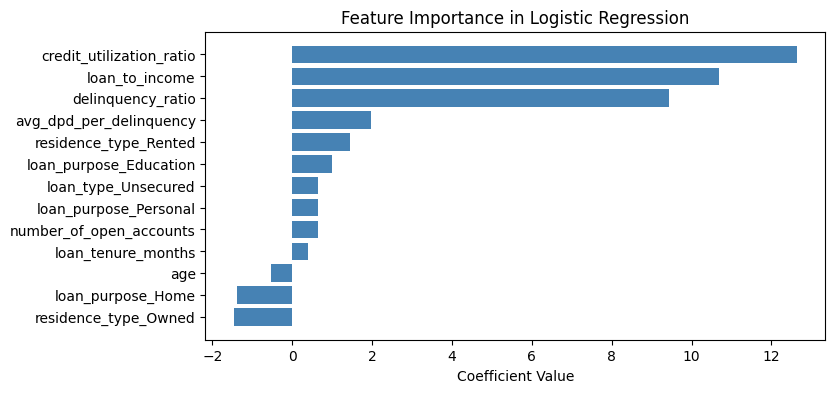

In [ ]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=x_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_encoded, y_train)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train_encoded, y_train)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



here logistic xgb and random are same prediction. so we can choose logistic it gives more interpretation.

 Randomized search CV For Attempt 1: Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': 1438.44988828766}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(x_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7879337792797508
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.76      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.87      0.91      0.89     12497
weighted avg       0.97      0.96      0.96     12497



Attempt 2

1.  Logistic Regression & XGB
2. Handle Class Imbalance Using Under Sampling




In [ ]:
y_train_res.value_counts ()

,count
default,
0,3223
1,3223


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_train_res, y_train_res = rus.fit_resample(x_train_encoded, y_train)
y_train_res.value_counts()
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)



              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [ ]:
model = XGBClassifier(**random_search.best_params_)
model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [ ]:
y_train_smt.value_counts()

,count
default,
0,34195
1,34195


In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(x_train_encoded, y_train)
y_train_smt.value_counts()

,count
default,
0,34195
1,34195


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_train_smt, y_train_smt = rus.fit_resample(x_train_encoded, y_train)
y_train_res.value_counts()
model = LogisticRegression()
model.fit(x_train_smt, y_train_smt)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [ ]:
model = XGBClassifier(**random_search.best_params_)
model.fit(x_train_smt, y_train_smt)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



In [ ]:
!pip install optuna
import optuna
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, x_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-03-01 08:10:52,900] A new study created in memory with name: no-name-aa78bbdb-1359-405e-bcb8-ddce7c7dbe2e
[I 2025-03-01 08:10:58,999] Trial 0 finished with value: 0.9123527848532934 and parameters: {'C': 0.028032425593846486, 'solver': 'lbfgs', 'tol': 7.460099907654325e-05, 'class_weight': None}. Best is trial 0 with value: 0.9123527848532934.
[I 2025-03-01 08:10:59,203] Trial 1 finished with value: 0.9320064360514566 and parameters: {'C': 0.7391756474895567, 'solver': 'newton-cg', 'tol': 3.534841964167438e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9320064360514566.
[I 2025-03-01 08:10:59,333] Trial 2 finished with value: 0.7790975925246096 and parameters: {'C': 0.00010199409001671919, 'solver': 'newton-cg', 'tol': 1.1411911054148736e-05, 'class_weight': None}. Best is trial 1 with value: 0.9320064360514566.
[I 2025-03-01 08:10:59,531] Trial 3 finished with value: 0.934663352704478 and parameters: {'C': 4525.264208972499, 'solver': 'saga', 'tol': 0.07127915

In [ ]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(x_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(x_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9357553819840388
  Params: 
    C: 3824.355136735335
    solver: saga
    tol: 1.3186080729955737e-05
    class_weight: None
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.54      0.95      0.69      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.82     12497
weighted avg       0.96      0.93      0.93     12497



In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, x_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-03-01 08:11:59,274] A new study created in memory with name: no-name-4f294abf-6a70-4b5c-89e5-6a0e6c1579c5
[I 2025-03-01 08:11:59,898] Trial 0 finished with value: 0.9371690941701761 and parameters: {'lambda': 0.013584776895376367, 'alpha': 1.8695102827355592, 'subsample': 0.7085240946209358, 'colsample_bytree': 0.6870047803345509, 'max_depth': 7, 'eta': 0.20578870680979258, 'gamma': 4.565808560932143, 'scale_pos_weight': 3.4692808616457413, 'min_child_weight': 5, 'max_delta_step': 1}. Best is trial 0 with value: 0.9371690941701761.
[I 2025-03-01 08:12:00,115] Trial 1 finished with value: 0.9148698261540192 and parameters: {'lambda': 0.04429813016674704, 'alpha': 1.3566480827884213, 'subsample': 0.777881126200305, 'colsample_bytree': 0.449475315795162, 'max_depth': 6, 'eta': 0.18451102695957858, 'gamma': 9.767275187236988, 'scale_pos_weight': 8.150117199152419, 'min_child_weight': 8, 'max_delta_step': 1}. Best is trial 0 with value: 0.9371690941701761.
[I 2025-03-01 08:12:00,371

In [ ]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(x_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(x_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9433305042789475
  Params: 
    lambda: 0.021603921927657446
    alpha: 0.1654526422559534
    subsample: 0.9614420841900815
    colsample_bytree: 0.8538508736662889
    max_depth: 3
    eta: 0.29291352772091506
    gamma: 0.019737537625616364
    scale_pos_weight: 1.5288327797967503
    min_child_weight: 6
    max_delta_step: 8
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.55      0.97      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.95      0.83     12497
weighted avg       0.96      0.93      0.94     12497



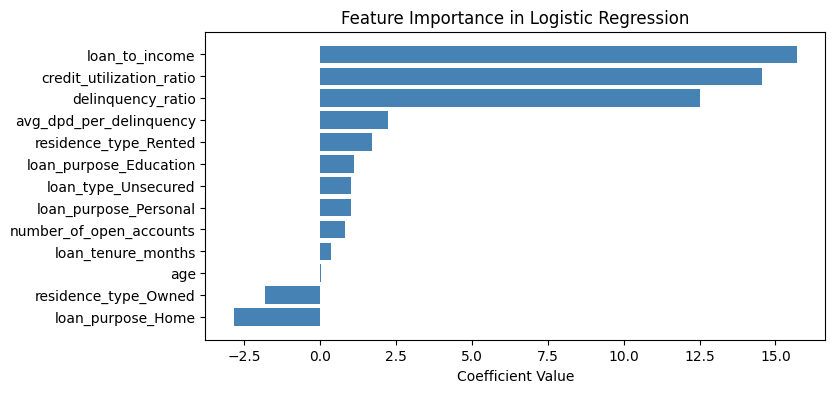

In [ ]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=x_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [ ]:
import os
os.makedirs('artifacts', exist_ok=True)
from joblib import dump

model_data = {
    'model': final_model,
    'features': x_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']